<a href="https://colab.research.google.com/github/subupkrl/Python/blob/master/UMLDay1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [3]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
dataset = pd.DataFrame(cancer_dataset['data'], columns=cancer_dataset['feature_names'])
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_dataset = scaler.fit_transform(dataset)
print(scaled_dataset)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [9]:
#PCA - feature reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dataset = pca.fit_transform(scaled_dataset)
print(pca_dataset)

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


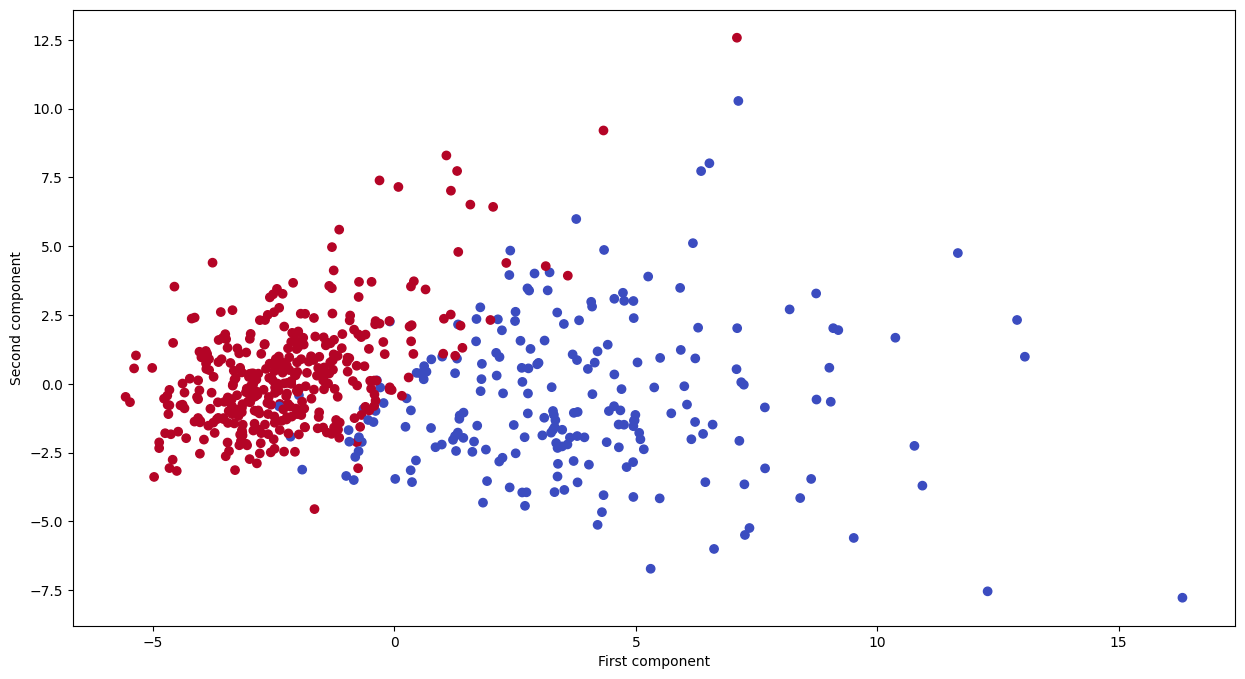

In [17]:
plt.figure(figsize=(15,8))
plt.scatter((pca_dataset[:,0]),(pca_dataset[:,1]),c=cancer_dataset['target'],cmap='coolwarm')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show()

**<h1> K-means </h1>**

In [18]:
from sklearn.datasets import make_blobs

In [19]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=3)
print(y)

[0 1 0 0 1 2 1 2 0 0 2 2 1 2 2 1 0 1 2 1 1 2 1 0 0 0 2 2 0 2 2 1 0 2 2 1 2
 1 0 0 0 2 0 1 2 2 2 2 1 2 0 2 1 2 0 0 1 0 0 2 1 2 1 2 1 1 0 1 1 2 1 2 2 2
 1 1 1 1 0 1 0 1 1 2 0 0 0 1 1 0 2 1 2 1 1 2 2 0 1 2 1 1 2 1 2 1 1 0 1 1 2
 0 0 1 1 0 1 2 2 1 0 2 0 0 0 0 0 2 1 1 0 1 0 0 0 0 1 2 0 0 1 1 1 0 0 2 0 2
 0 1 1 0 1 0 0 0 2 2 2 1 1 2 1 2 0 1 2 1 1 2 0 1 2 0 0 0 1 0 1 2 2 0 1 2 2
 2 1 1 0 0 2 2 2 2 0 1 0 1 0 0 2 2 2 2 1 1 2 0 0 1 1 0 1 2 2 1 2 1 2 1 1 2
 0 2 2 0 2 1 1 0 2 1 1 2 0 2 1 0 1 0 2 1 1 0 1 1 0 0 0 0 2 1 0 2 2 1 1 1 0
 0 0 0 1 1 0 0 2 0 0 1 2 0 1 1 0 1 0 2 1 0 1 1 1 0 2 1 2 2 2 1 1 2 0 1 0 0
 1 1 2 2 1 1 0 0 2 1 2 0 1 1 0 1 1 1 0 2 2 1 0 0 1 2 0 0 0 0 2 0 1 0 2 2 1
 2 1 1 0 1 0 2 2 0 0 0 2 2 0 1 0 0 1 0 0 2 2 2 2 1 1 0 2 0 0 2 0 1 2 2 1 1
 2 2 0 1 0 2 2 0 0 2 1 1 1 2 0 0 2 2 1 2 1 0 0 2 0 1 1 2 1 0 0 0 1 0 0 1 2
 1 2 0 1 1 0 2 2 1 0 2 1 1 1 1 2 0 0 2 2 1 2 1 2 1 2 2 2 2 0 2 2 2 0 2 2 2
 0 0 2 1 2 1 0 2 2 1 1 1 1 2 1 1 1 1 2 1 2 0 2 1 1 0 0 0 1 2 2 1 0 2 0 0 1
 1 2 0 0 1 0 1 0 2 0 0 0 

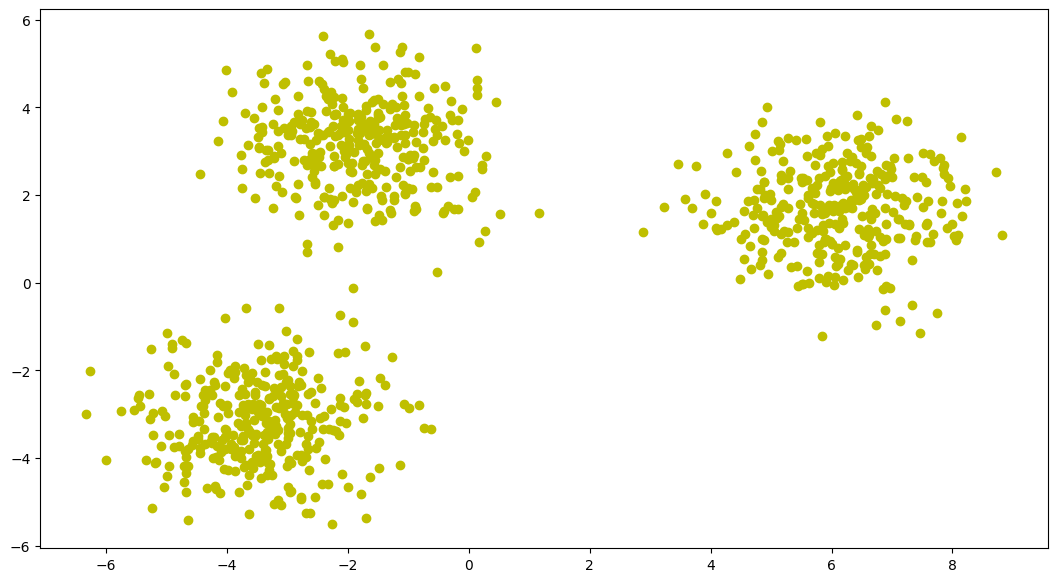

In [23]:
plt.figure(figsize=(13,7))
plt.scatter((X[:,0]),(X[:,1]),c='y')
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
print(scaled_X)

[[-0.41999671  0.90387084]
 [-0.97639807 -1.47782316]
 [-0.67377949  0.78393542]
 ...
 [-0.89733891 -0.9183568 ]
 [-1.10521345 -1.41229698]
 [ 1.03630199  0.23688069]]


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.2,random_state=42)

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.cluster import KMeans

In [34]:
#computing value of k using elbow method
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)


In [36]:
wcss

[1599.9999999999993,
 792.1336878797904,
 133.55047464327555,
 115.16764348443644,
 109.1379619266608,
 75.82082381033975,
 70.24252230782973,
 63.18522103757198,
 56.414480112759435,
 52.27420446241286]

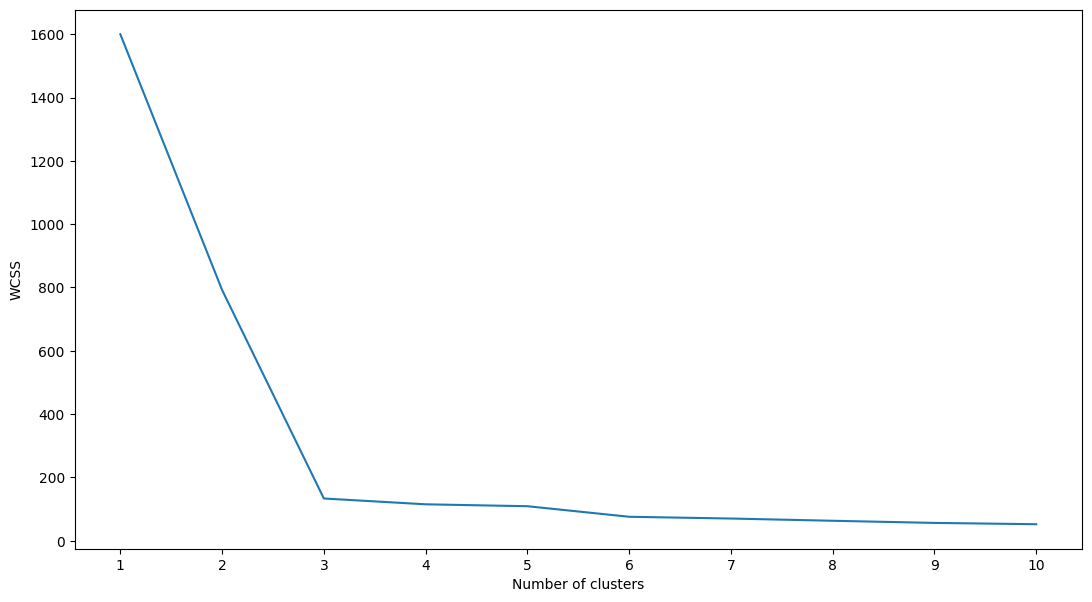

In [37]:
#plot elbow curve
plt.figure(figsize=(13,7))
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit_predict(X_train_scaled)

array([1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1,
       0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 1,
       1, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0,
       0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 0,
       2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1,
       0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2,

In [42]:
y_pred = kmeans.predict(X_test_scaled)
y_pred

array([2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1,
       2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2,
       1, 2], dtype=int32)

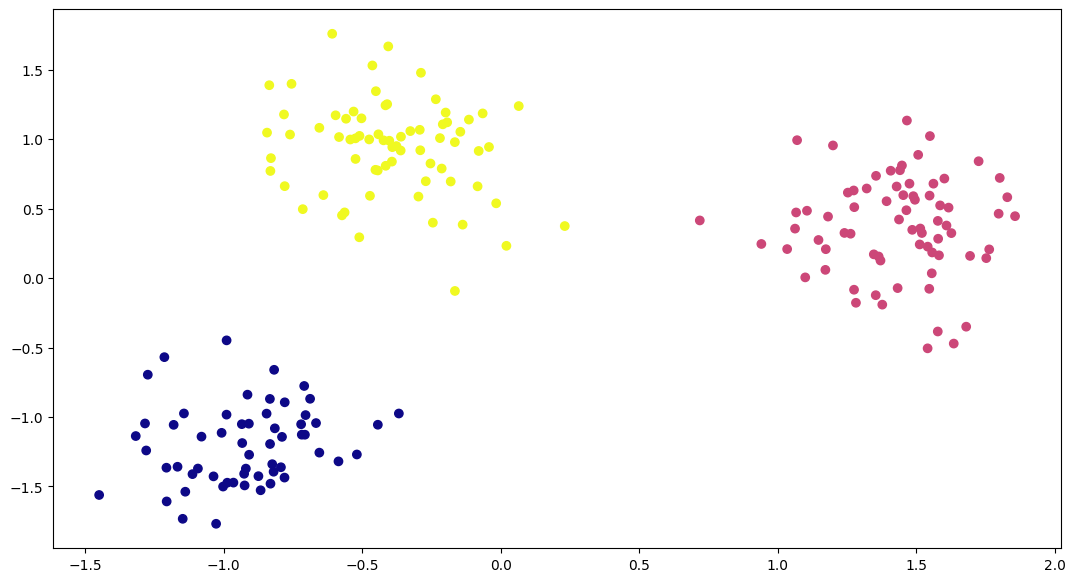

In [45]:
plt.figure(figsize=(13,7))
plt.scatter(X_test_scaled[:,0],X_test_scaled[:,1],c=y_pred,cmap='plasma')
plt.show()

In [49]:
#Validating k value
#Kneelocator
# !pip install kneed
from kneed import KneeLocator

In [50]:
k = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k.elbow

np.int64(3)

In [51]:
#silhouette score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train_scaled)
  score = silhouette_score(X_train_scaled,kmeans.labels_)
  silhouette_coefficients.append(score)

In [52]:
silhouette_coefficients

[np.float64(0.5966704700435586),
 np.float64(0.7447632558819083),
 np.float64(0.6220011167655332),
 np.float64(0.48880570538706),
 np.float64(0.4725310907106815),
 np.float64(0.36227448238967513),
 np.float64(0.3393610333728877),
 np.float64(0.3350059706740114),
 np.float64(0.3242829059095289)]

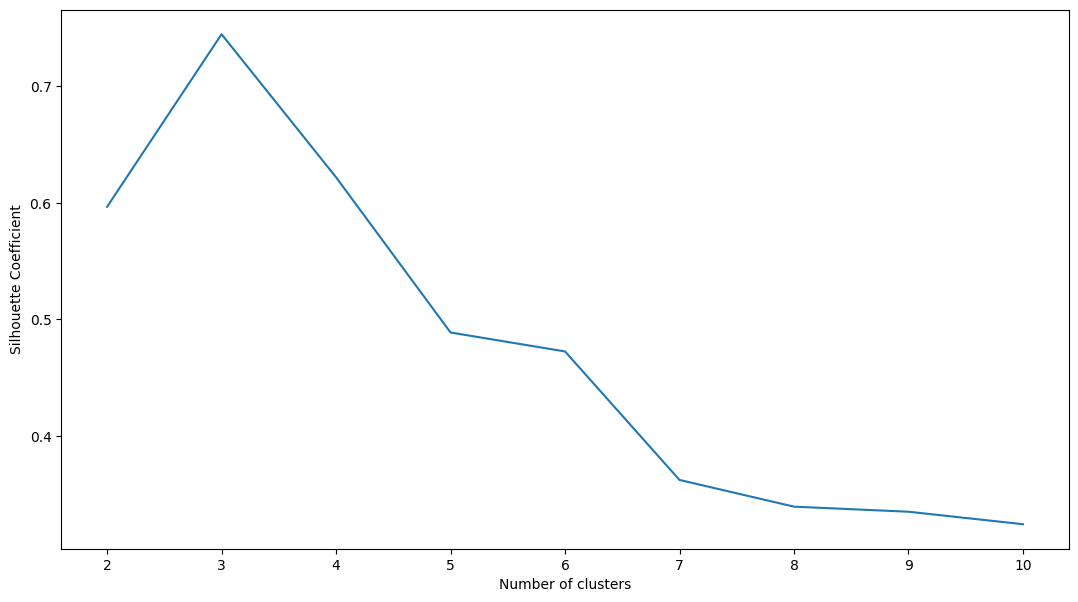

In [53]:
plt.figure(figsize=(13,7))
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

**<h1> Hierarchial Clustering </h1>**

In [55]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [56]:
iris_dataset = pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_iris_data = scaler.fit_transform(iris_dataset)
print(scaled_iris_data)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_iris_data = pca.fit_transform(scaled_iris_data)
print(pca_iris_data)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

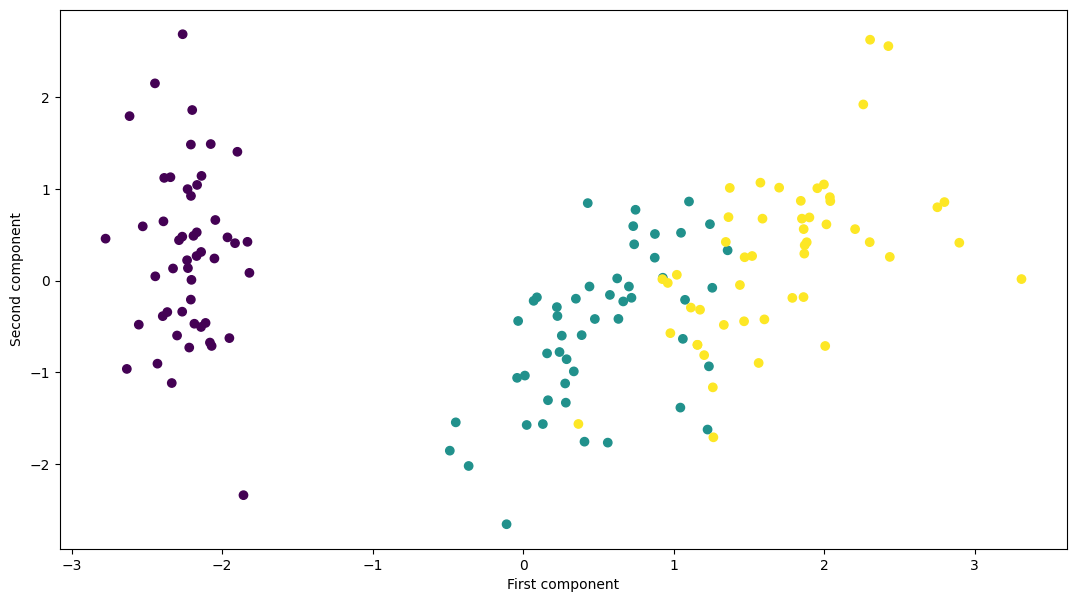

In [59]:
plt.figure(figsize=(13,7))
plt.scatter((pca_iris_data[:,0]),(pca_iris_data[:,1]),c=iris.target)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.show()

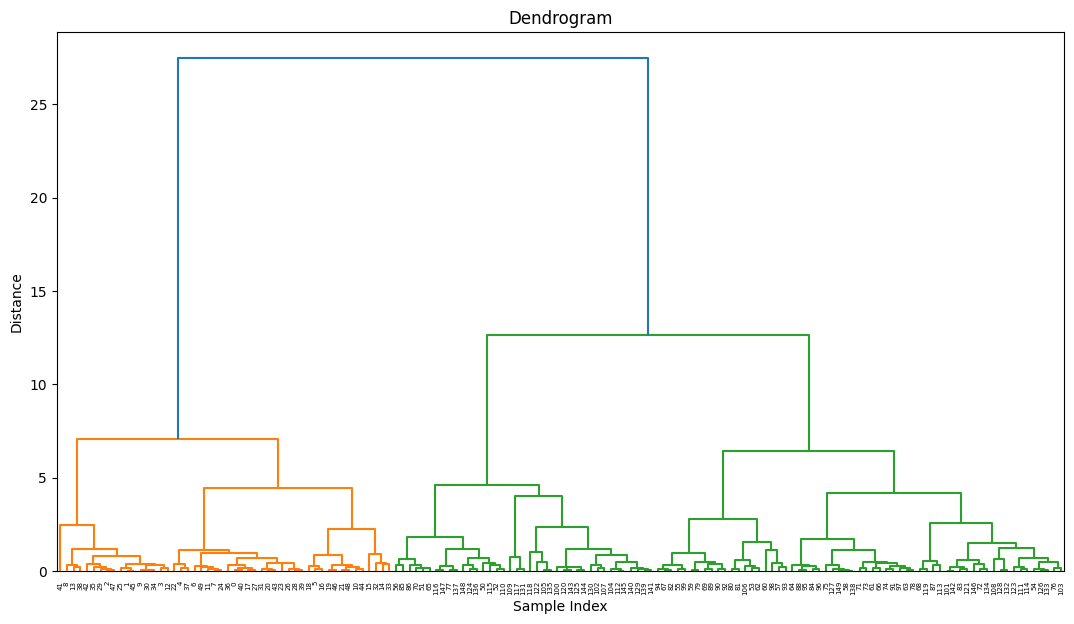

In [60]:
#dendogram - to show hierarchy
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(13,7))
plt.title('Dendrogram')
sc.dendrogram(sc.linkage(pca_iris_data,method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

**<h1> Agglomerative Clustering </h1>**

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [62]:
cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean')
y_pred = cluster.fit_predict(pca_iris_data)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

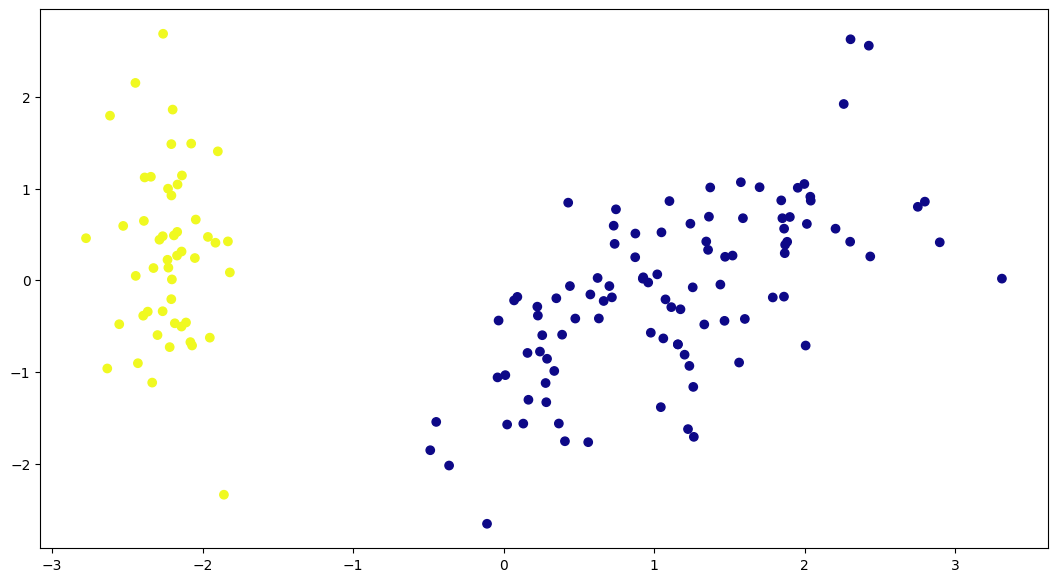

In [65]:
plt.figure(figsize=(13,7))
plt.scatter(pca_iris_data[:,0],pca_iris_data[:,1],c=cluster.labels_,cmap='plasma')
plt.show()